# Distribuciones Muestrales, Ley de los Grandes Números y Teorema Central del Límite

Este notebook explora los conceptos fundamentales de la inferencia estadística: la **distribución muestral**, la **Ley de los Grandes Números (LLN)** y el **Teorema Central del Límite (CLT)**. A través de simulaciones y visualizaciones, comprenderemos cómo se comportan las medias muestrales y por qué la normalidad emerge en muchos contextos.

## ---1. Definición de población y parámetros poblacionales

En estadística, una **población** es el conjunto completo de elementos o individuos que cumplen ciertas características. Los **parámetros poblacionales** (como la media y la desviación estándar) describen propiedades de toda la población.

Ejemplo: Supongamos que la población es el conjunto de alturas de todos los estudiantes de una universidad.

Media poblacional: 169.99 cm
Desviación estándar poblacional: 7.02 cm


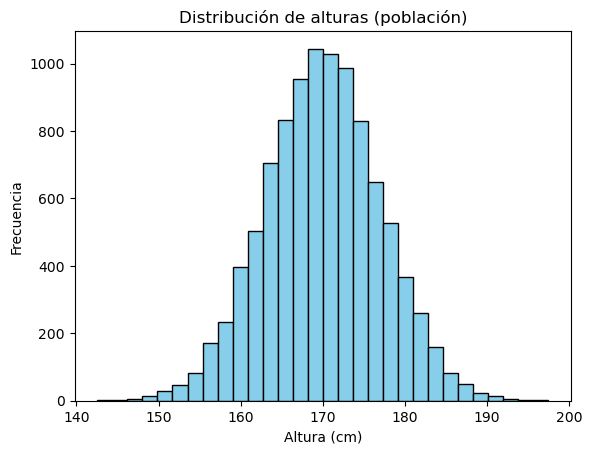

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulamos una población de 10,000 estudiantes con media 170 cm y desviación estándar 7 cm
np.random.seed(42)
poblacion = np.random.normal(loc=170, scale=7, size=10000)

media_poblacional = np.mean(poblacion)
desv_poblacional = np.std(poblacion)

print(f"Media poblacional: {media_poblacional:.2f} cm")
print(f"Desviación estándar poblacional: {desv_poblacional:.2f} cm")

plt.hist(poblacion, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de alturas (población)')
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')
plt.show()

## ---2. ¿Qué es una muestra? Definición y motivación

Una **muestra** es un subconjunto de la población, seleccionada para realizar inferencias sobre la población completa. Trabajamos con muestras porque muchas veces es imposible o costoso medir a toda la población.

Ejemplo: Seleccionamos aleatoriamente 50 estudiantes para medir sus alturas.

In [ ]:
# Tomamos una muestra aleatoria de 50 estudiantes
muestra = np.random.choice(poblacion, size=50, replace=False)

media_muestra = np.mean(muestra)
desv_muestra = np.std(muestra)

print(f"Media muestral: {media_muestra:.2f} cm")
print(f"Desviación estándar muestral: {desv_muestra:.2f} cm")

plt.hist(muestra, bins=10, color='orange', edgecolor='black')
plt.title('Distribución de alturas (muestra)')
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')
plt.show()

## ---3. Distribución muestral de la media

Si repetimos el proceso de tomar muestras y calcular la media de cada una, obtenemos la **distribución muestral de la media**. Esta distribución describe cómo varían las medias muestrales de muestra en muestra.

Vamos a simular este proceso:

In [ ]:
# Simulamos la distribución muestral de la media
n_muestras = 1000
size_muestra = 50
medias_muestrales = []

for _ in range(n_muestras):
    muestra_tmp = np.random.choice(poblacion, size=size_muestra, replace=False)
    medias_muestrales.append(np.mean(muestra_tmp))

plt.hist(medias_muestrales, bins=30, color='green', edgecolor='black')
plt.title('Distribución muestral de la media (n=50)')
plt.xlabel('Media muestral (cm)')
plt.ylabel('Frecuencia')
plt.show()

print(f"Media de las medias muestrales: {np.mean(medias_muestrales):.2f} cm")
print(f"Desviación estándar de las medias muestrales: {np.std(medias_muestrales):.2f} cm")

## ---4. Ley de los Grandes Números (LLN)

La **Ley de los Grandes Números** establece que, a medida que el tamaño de la muestra aumenta, la media muestral tiende a acercarse a la media poblacional. Es decir, cuanto más grande es la muestra, más precisa es la estimación de la media de la población.

In [ ]:
# Ilustramos la Ley de los Grandes Números
n = 1000
muestras_lln = np.random.choice(poblacion, size=n, replace=False)
medias_acumuladas = [np.mean(muestras_lln[:i]) for i in range(1, n+1)]

plt.plot(range(1, n+1), medias_acumuladas, label='Media muestral acumulada')
plt.axhline(media_poblacional, color='red', linestyle='--', label='Media poblacional')
plt.xlabel('Tamaño de la muestra')
plt.ylabel('Media acumulada (cm)')
plt.title('Convergencia de la media muestral a la media poblacional (LLN)')
plt.legend()
plt.show()

## ---5. Teorema Central del Límite (CLT)

El **Teorema Central del Límite** afirma que, si tomamos muchas muestras aleatorias de tamaño suficientemente grande de cualquier población (con media y varianza finitas), la distribución de las medias muestrales tiende a ser normal, sin importar la forma de la población original.

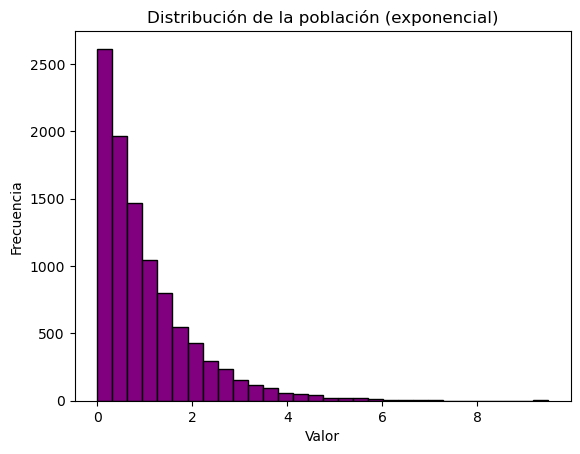

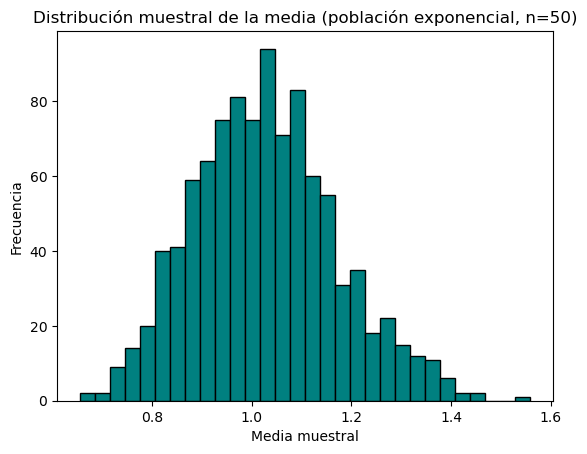

In [2]:
# Población no normal: distribución exponencial
poblacion_exp = np.random.exponential(scale=1, size=10000)

plt.hist(poblacion_exp, bins=30, color='purple', edgecolor='black')
plt.title('Distribución de la población (exponencial)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

# Simulamos la distribución muestral de la media para la población exponencial
n_muestras = 1000
size_muestra = 50
medias_muestrales_exp = []

for _ in range(n_muestras):
    muestra_tmp = np.random.choice(poblacion_exp, size=size_muestra, replace=False)
    medias_muestrales_exp.append(np.mean(muestra_tmp))

plt.hist(medias_muestrales_exp, bins=30, color='teal', edgecolor='black')
plt.title('Distribución muestral de la media (población exponencial, n=50)')
plt.xlabel('Media muestral')
plt.ylabel('Frecuencia')
plt.show()

## ---6. Conclusiones

- La media muestral es una buena estimación de la media poblacional, especialmente con muestras grandes (LLN).
- La distribución de las medias muestrales tiende a ser normal, incluso si la población original no lo es (CLT).
- Estos conceptos son la base de la inferencia estadística y justifican el uso de la normalidad en muchos procedimientos.

## ---6. Efecto del tamaño de muestra en la distribución muestral

El tamaño de la muestra influye en la dispersión de la distribución muestral de la media. A mayor tamaño de muestra, menor es la variabilidad de las medias muestrales. Vamos a comparar diferentes tamaños de muestra.

In [ ]:
# Comparamos la distribución muestral de la media para diferentes tamaños de muestra
sizes = [5, 30, 100]
plt.figure(figsize=(12, 4))
for i, size in enumerate(sizes, 1):
    medias = [np.mean(np.random.choice(poblacion, size=size, replace=False)) for _ in range(1000)]
    plt.subplot(1, 3, i)
    plt.hist(medias, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'n = {size}')
    plt.xlabel('Media muestral')
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.suptitle('Distribución muestral de la media para diferentes tamaños de muestra', y=1.05)
plt.show()

## ---7. Error estándar de la media

El **error estándar** de la media es la desviación estándar de la distribución muestral de la media. Se calcula como:

$\sigma_{\overline{X}} = \frac{\sigma}{\sqrt{n}}$

donde $\sigma$ es la desviación estándar poblacional y $n$ el tamaño de la muestra.

In [ ]:
# Calculamos el error estándar teórico y lo comparamos con el empírico
n = 50
error_estandar_teorico = desv_poblacional / np.sqrt(n)
error_estandar_empirico = np.std(medias_muestrales)

print(f"Error estándar teórico: {error_estandar_teorico:.2f} cm")
print(f"Error estándar empírico (simulación): {error_estandar_empirico:.2f} cm")

## ---8. Distribución muestral de la proporción

No solo la media tiene una distribución muestral, también la proporción. Por ejemplo, la proporción de estudiantes que miden más de 175 cm en diferentes muestras aleatorias.

In [ ]:
# Simulamos la distribución muestral de la proporción de estudiantes con altura > 175 cm
n_muestras = 1000
size_muestra = 50
proporciones = []

for _ in range(n_muestras):
    muestra_tmp = np.random.choice(poblacion, size=size_muestra, replace=False)
    prop = np.mean(muestra_tmp > 175)
    proporciones.append(prop)

plt.hist(proporciones, bins=20, color='coral', edgecolor='black')
plt.title('Distribución muestral de la proporción (altura > 175 cm)')
plt.xlabel('Proporción')
plt.ylabel('Frecuencia')
plt.show()

print(f"Proporción poblacional (altura > 175 cm): {np.mean(poblacion > 175):.2f}")

## ---9. Error estándar de la proporción

El **error estándar de la proporción** se calcula como:

\[ \text{Error estándar} = \sqrt{\frac{p(1-p)}{n}} \]

donde $p$ es la proporción poblacional y $n$ el tamaño de la muestra.

In [ ]:
# Calculamos el error estándar teórico y empírico de la proporción
p = np.mean(poblacion > 175)
n = 50
error_estandar_teorico = np.sqrt(p * (1 - p) / n)
error_estandar_empirico = np.std(proporciones)

print(f"Error estándar teórico: {error_estandar_teorico:.3f}")
print(f"Error estándar empírico (simulación): {error_estandar_empirico:.3f}")

## ---10. Resumen visual de los conceptos

A continuación, se muestra un esquema que resume la relación entre población, muestra, distribución muestral, error estándar y los teoremas vistos.

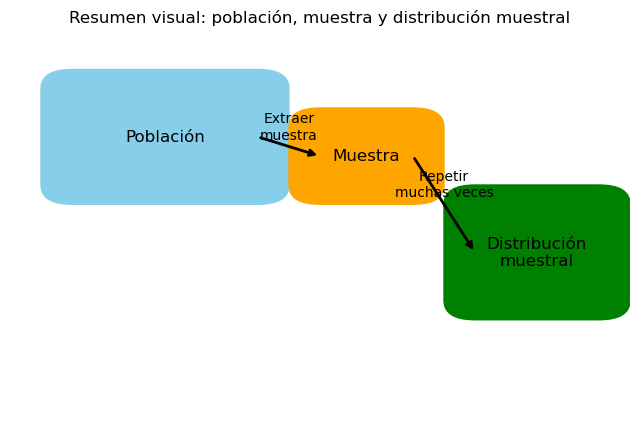

In [3]:
# Esquema visual de los conceptos clave
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize=(8, 5))

# Población
pop = mpatches.FancyBboxPatch((0.1, 0.6), 0.3, 0.25, boxstyle="round,pad=0.05", color='skyblue', label='Población')
ax.add_patch(pop)
ax.text(0.25, 0.725, 'Población', ha='center', va='center', fontsize=12)

# Muestra
sample = mpatches.FancyBboxPatch((0.5, 0.6), 0.15, 0.15, boxstyle="round,pad=0.05", color='orange', label='Muestra')
ax.add_patch(sample)
ax.text(0.575, 0.675, 'Muestra', ha='center', va='center', fontsize=12)

# Distribución muestral
dist = mpatches.FancyBboxPatch((0.75, 0.3), 0.2, 0.25, boxstyle="round,pad=0.05", color='green', label='Distribución muestral')
ax.add_patch(dist)
ax.text(0.85, 0.425, 'Distribución\nmuestral', ha='center', va='center', fontsize=12)

# Flechas
ax.annotate('', xy=(0.5, 0.675), xytext=(0.4, 0.725), arrowprops=dict(arrowstyle='->', lw=2))
ax.annotate('', xy=(0.75, 0.425), xytext=(0.65, 0.675), arrowprops=dict(arrowstyle='->', lw=2))

# Textos
ax.text(0.45, 0.75, 'Extraer\nmuestra', ha='center', va='center', fontsize=10)
ax.text(0.7, 0.6, 'Repetir\nmuchas veces', ha='center', va='center', fontsize=10)

ax.axis('off')
plt.title('Resumen visual: población, muestra y distribución muestral')
plt.show()

## ---11. Ejercicio propuesto

**Ejercicio:**

Simula una población con distribución uniforme entre 100 y 200. Extrae 1000 muestras de tamaño 40 y grafica la distribución muestral de la media. ¿La forma de la distribución muestral es similar a la normal? ¿Por qué?

## ---12. Espacio para tu respuesta

Utiliza la celda de abajo para escribir tu código y reflexiones sobre el ejercicio propuesto.

In [ ]:
# Escribe aquí tu código para el ejercicio propuesto
